In [1]:
#source EPOTFenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#EPOTFenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate

#import all the libraries needed
from import_dep import *

# import my functions stored in the file 'functions' which can then be called with functions.function_name()
import functions

# Output Directories
path_1 =  ('/Users/horatiocox/Desktop/RUG Postdoc/Experiments/Electrical/VDP_HC003_051124/Output/')

# Experimental Data Directories
directory_1 = Path('/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/Data/')


############## User Defined Variables ##############

# Define the path to the directory containing the experimental data
directory_in = directory_1
# Define the path to the output directory to save data generated here
path_out = path_1

plot_data = False # set to True to plot the data and export to path_out
fig_format = 'png' # format of the figure to be saved
plot_transparency = True # set to True to make the data plots transparent

powerpoint_data = False # set to True to export the data to a powerpoint presentation and export to path_out

material_title = '$HZO$' # Material to be added to plot titles
plot_string = 'YFW042_HZO' # string to be used at the start of the figure file name

film_thickness = 1e-9 # Film thickness in meters (m) 

##########TO DO LIST
# change so that if film_thickness == 0 all the functions output the sheet resistance
# and the plots show sheet resistance instead of resistivity
# including the output file names
# - SET to zero for sheet resistance calculations instead of resistivity??????


############## End User Defined Variables ##############


## Import Measurement Data 

In [2]:
#'JT029_SrRuO3_171024_Combined_fullrange.txt'
#'JT029_SrRuO3_191024_Combined4'
#'HC003_BaSnO3_STO_061124_Hall'
data_import_np, data_import_df = functions.import_ppms_data(directory_in.joinpath('YF042_HfO2_STO_071124_Hall_5'))
print('np shape:', data_import_np.shape)
print(data_import_df.head(6))
# Note that field has been converted to Tesla

np shape: (2508, 5, 6)
   Temp (K)  Field (T)  Source (A)  Source (V)  Sense (V)  index
0    2.0086   0.000011      -0.001    -0.01052  -0.000007      0
1    2.0086   0.000011      -0.001    -0.01052   0.000129      1
2    2.0086   0.000011      -0.001    -0.01052  -0.000004      2
3    2.0086   0.000011      -0.001    -0.01052  -0.000006      3
4    2.0086   0.000011      -0.001    -0.01052   0.000138      4
5    2.0086   0.000011      -0.001    -0.01052  -0.000131      5


## Extract and Check Temperature, Field, and Current values

In [3]:
# Extract the current, temperature and field values from the data as lists along with the number of values used for each
# if re-ordering is true then we reassign data_np to order the fields from -Bmax to Bmax
# Reduced_data = [1,-5] means that the first and last 5 temperature points are removed from the data
[ctf, tf_av, data_np, data_df] = functions.extract_ctf(data_import_np, reorder = True, Reduced_temp = False, Reduced_current=False)

print('np shape:', data_np.shape)
# Check you have the expected and correct Temperature, Field and Current values!
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]


print(data_df.head())




11 Currents (uA): [-1000.  -800.  -600.  -400.  -200.     0.   200.   400.   600.   800.
  1000.]
6 Temperatures (K): [ 2.  7. 12. 17. 22. 27.]
38 Fields (kOe): [-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.  -0.   0.   5.  10.  15.  20.  25.  30.  35.  40.
  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.]
Is this correct?
np shape: (2508, 5, 6)
   Temp (K)  Field (T)  Source (A)  Source (V)  Sense (V)
0    1.9999  -8.999963     -0.0010    -0.01564  -0.000017
1    1.9999  -8.999963     -0.0008    -0.01315  -0.000013
2    1.9999  -8.999963     -0.0006    -0.01063  -0.000010
3    1.9999  -8.999963     -0.0004    -0.00683  -0.000007
4    1.9999  -8.999963     -0.0002    -0.00338  -0.000004


## Calculate Van der Pauw Resistivity 

In [4]:


[res_data, res_data_df, R_squared_res] = functions.vdp_resistivity(data_np, film_thickness, ctf, tf_av)

print(res_data_df.head(5))

   Temp (K)  Field (T)  rho_xx_A (ohm.m)  rho_xx_B(ohm.m)  \
0    1.9999  -8.999963      1.000000e-09     1.923568e-11   
1    1.9993  -8.500045      3.622552e-11     2.138104e-11   
2    2.0002  -8.000032      3.815168e-11     1.860915e-11   
3    2.0001  -7.500031      3.341863e-11     2.032356e-11   
4    2.0013  -7.000051      3.382480e-11     1.905795e-11   

   rho_xx_average(ohm.m)  
0           5.096178e-10  
1           2.880328e-11  
2           2.838041e-11  
3           2.687109e-11  
4           2.644138e-11  


/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/functions.py:214: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  R_sheet_B = fsolve(vdp_equation, initial_guess, args=(R_01_23[0], R_13_02[0]))[0]


## Plot IV data to Check Linearity of Resitivity Measurements

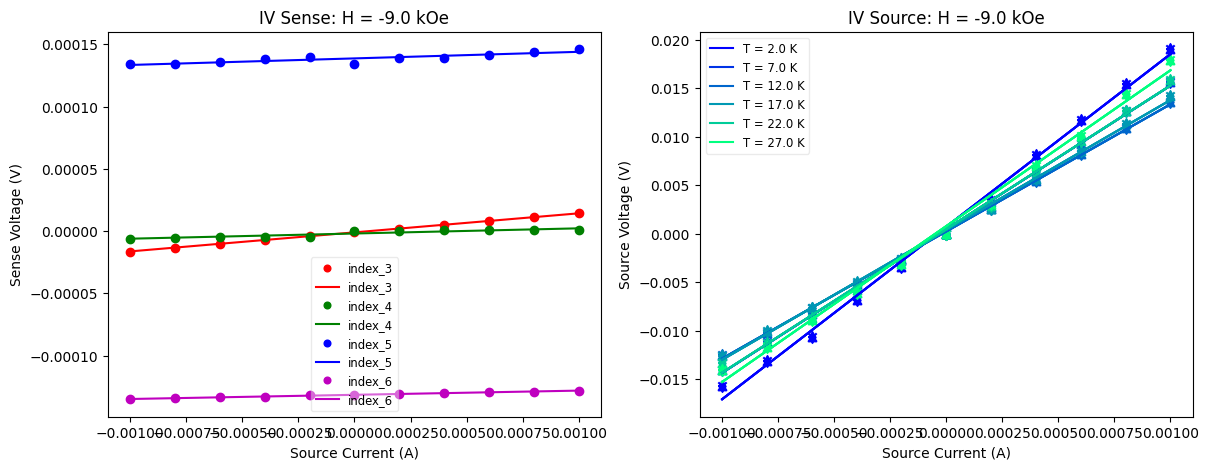

In [5]:
fig0 = plt.figure(figsize=(14, 5))
gs = fig0.add_gridspec(1, 2)
ax = fig0.add_subplot(gs[0, 0])
ax1 = fig0.add_subplot(gs[0, 1])

labels = ['index_3', 'index_4', 'index_5', 'index_6']

## Plotting Source(I) vs Sense(V) data
colors = ['r', 'g', 'b', 'm']
for i in range(4):
    R_test = linregress(data_np[0:ctf[3], 2, 2+i], data_np[0:ctf[3], 4, 2+i])
    ax.plot(data_np[0:ctf[3], 2, 2+i], data_np[0:ctf[3], 4, 2+i], 'o', label=f'{labels[i]}', color=colors[i])
    ax.plot(data_np[0:ctf[3], 2, 2+i], R_test.intercept + R_test.slope * data_np[0:ctf[3], 2, 2+i], color=colors[i], label=f'{labels[i]}')
ax.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

# Set labels and title
ax.set_xlabel('Source Current (A)')
ax.set_ylabel('Sense Voltage (V)')
ax.set_title(f'IV Sense: H = {np.round(data_np[0, 1, 2],decimals=0)} kOe')


## Plotting the Source IV data
colors = plt.get_cmap('winter')(np.linspace(0, 1, ctf[4]))
markers = ['+', 'x', '^', 'd']
for t in range(ctf[4]):
    counter = t*ctf[3]*ctf[5]
    for i in range(4):  
        R_test_2 = linregress(data_np[counter:ctf[3]+counter, 2, 2], data_np[counter:ctf[3]+counter, 3, 2+i])
        ax1.scatter(data_np[counter:ctf[3]+counter, 2, 2+i], data_np[counter:ctf[3]+counter, 3, 2+i], color=colors[t], marker=markers[i])
        ax1.plot(data_np[counter:ctf[3]+counter, 2, 2+i], R_test_2.intercept + R_test_2.slope * data_np[counter:ctf[3]+counter, 2, 2+i], color=colors[t])
    
    # Add a dummy plot for the legend entry
    ax1.plot([], [], color=colors[t], label=f'T = {ctf[1][t]} K')
    
    ax1.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

# Set labels and title
ax1.set_xlabel('Source Current (A)')
ax1.set_ylabel('Source Voltage (V)')
ax1.set_title(f'IV Source: H = {np.round(data_np[0, 1, 2],decimals=0)} kOe')


plt.show()

if plot_data == True:
    fig0.savefig(Path(path_out).joinpath(f'{plot_string}_IV_resistivity.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## R-squared Analysis to Check Linearity of I-V data

average R-squared = 0.9834256360293288


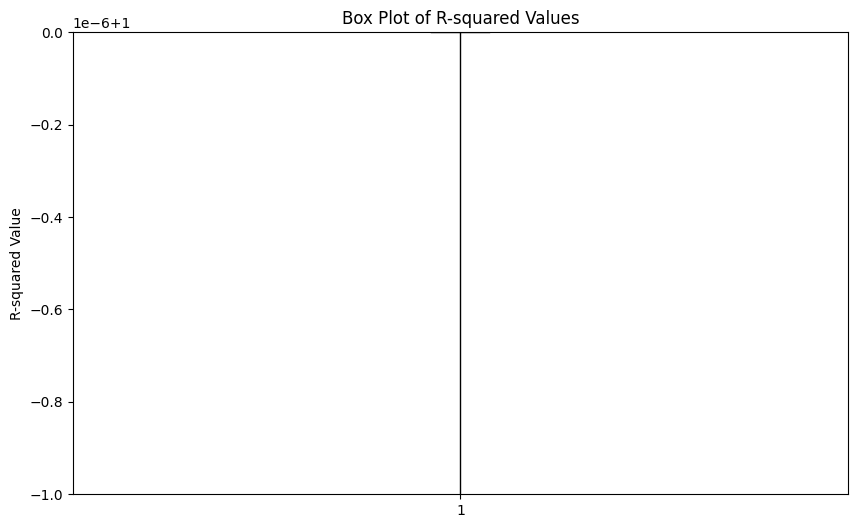

In [6]:
print('average R-squared =',sum(R_squared_res)/len(R_squared_res))

# Plot R-square values in a boxplot
# Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
fig1 = plt.figure(figsize=(10, 6))
ax = fig1.add_subplot(111)
ax.boxplot(R_squared_res)
ax.set_title('Box Plot of R-squared Values')
ax.set_ylabel('R-squared Value')
ax.set_ylim(1-1e-6, 1)  # If needed, you can set x-axis limits too
plt.show()



## Resistivity Configuration Compararison 
Comparing the resistivity in configuration A and B which are inverted versions of one another (e.g. source meter and sense meter swapped positions)
This is a good check for any systematic errors

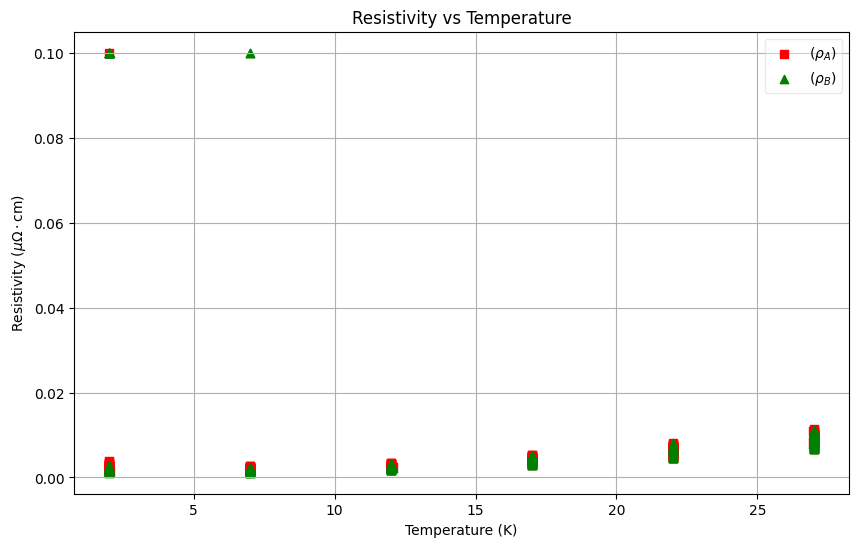

In [7]:
# Create a figure and axis
fig2 = plt.figure(figsize=(10, 6))
ax = fig2.add_subplot(111)  # Create a single subplot


# Plot R_sheet_A vs Temp
ax.scatter(res_data[:,0], res_data[:,2]* 1e8 , marker='s', color='r', label = r'($\rho_A$)')

# Plot R_sheet_B vs Temp
ax.scatter(res_data[:,0], res_data[:,3]* 1e8 , marker='^', color='g', label = r'($\rho_B$)')


# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Resistivity ($\mu \Omega \cdot$cm)')
ax.set_title('Resistivity vs Temperature')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc = 'best', framealpha=0.4)

# Show the plot
plt.show()

if plot_data == True:
    fig2.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_A_vs_B.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Resistivity vs Temperature

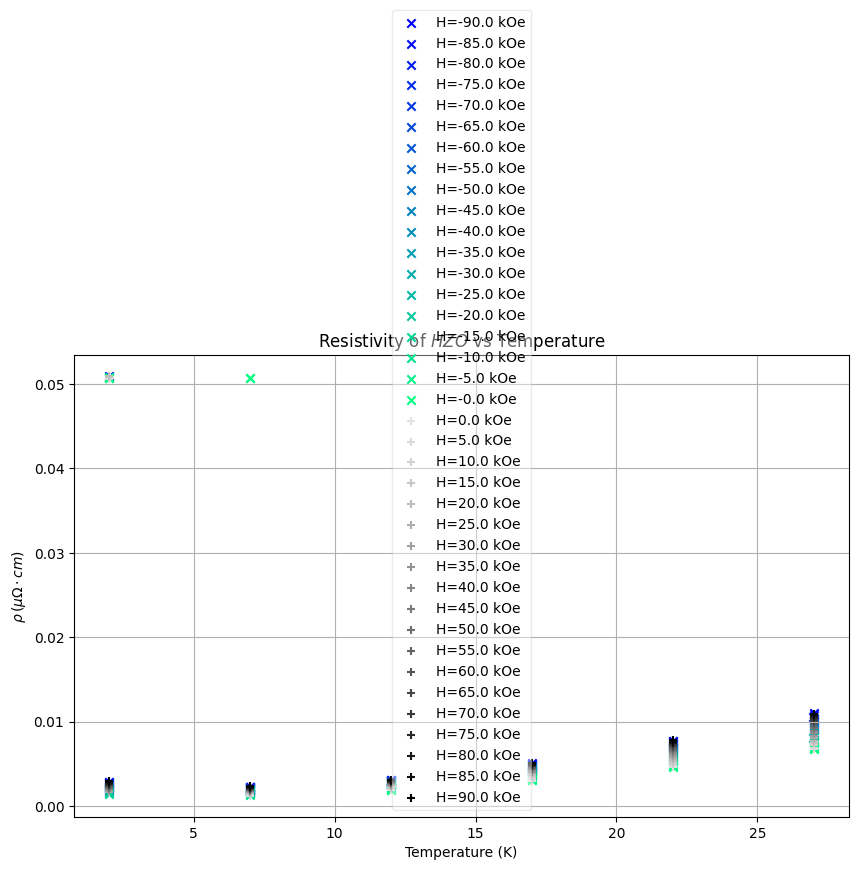

In [8]:
# Create a figure and axis
fig3 = plt.figure(figsize=(10, 6))
ax = fig3.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('winter')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('Greys')(np.linspace(0.2, 1, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)


for k in range(ctf[5]):
    # Plot rho_film vs Temp
    ax.scatter(res_data[k::ctf[5],0], res_data[k::ctf[5],4] * 1e8, marker=markers[k], color=c_val[k], label = f'H={np.round(res_data[k,1]*10,decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho\,(\mu \Omega \cdot cm)$')
ax.set_title(f'Resistivity of {material_title} vs Temperature')
# ax.set_xlim(0,100)
#ax.set_ylim(0,15)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc = 'best', framealpha=0.4)

# ax.set_xlim(200, 250)
#ax.set_ylim(0, 0.09)

# Show the plot
plt.show()

if plot_data == True:
    fig3.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)  


- Anderson localisation causes the metal insulator transition at low T
- If you have defects in film, they can have an external effect of localising charge carriers and reducing the conductivity
    - Also causes loss of metalicity beneath a certain thicknes of LSMO etc
    -  Defects localise the previously delocalised charge carriers, either due to thickness reudction or low T
    - Low thicknes its because number of defects is constant - > higher defect density
    

## Magnetoresistance vs H
- Plotting the magnetoresistance vs the Applied field strength (H) for several temperatures

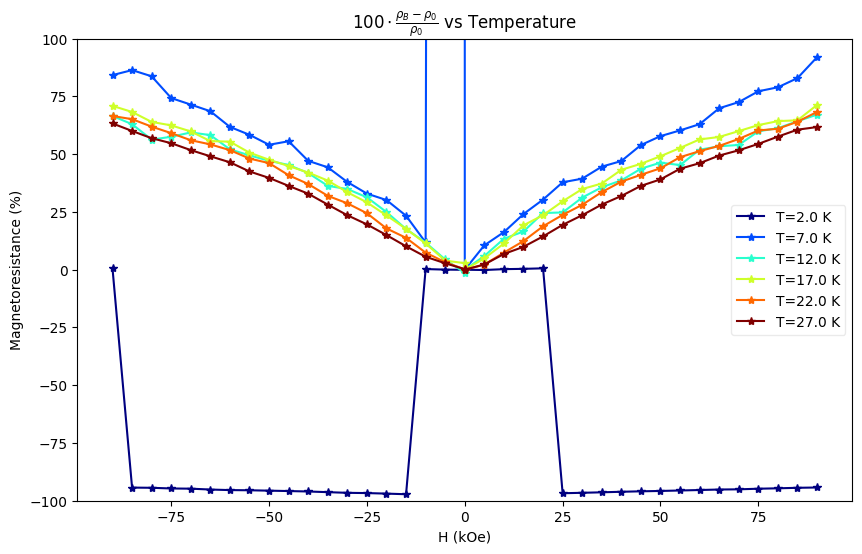

In [27]:

# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
mag_res = functions.magnetoresistance(data_np, film_thickness, ctf, tf_av)

fig4 = plt.figure(figsize=(10, 6))
ax = fig4.add_subplot(111)  # Create a single subplot

# Create a color map for the tempearature points
c_val = plt.cm.jet(np.linspace(0,1,ctf[4]))
# Create a marker array for the temperature points
markers = markers = ['+','.','*', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', 's', 'p', 'h', 'H', 'x', 'D', 'd', '|', '_']

for t_count, t in enumerate(ctf[1], start=0):  
    if t>1:
        # Add a plot of magnetoresistance vs field strength for each loop of temperature (excluding last field point which is repeat of B=0)
        ax.plot(ctf[2][:]*10, mag_res[t_count,:,2], marker='*', color=c_val[t_count], label = f'T={t} K')
        #plot repeat point of B=0 with an x marker to show the difference between two B=0 points
        #ax.scatter(ctf[2][int(ctf[5]/2)]*10, mag_res[t_count,int(ctf[5]/2),2], marker='x', color=c_val[t_count])
        
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'Magnetoresistance (%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax.legend(loc = 'best', framealpha=0.4)

ax.set_ylim(-100,100)

plt.show()

if plot_data == True:
    fig4.savefig(Path(path_out).joinpath(f'{plot_string}_magnetoresistance_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Magnetoresistance Vs T
- Now looking at how the Magnetoresitance at a set field strength varies over temperature
- Displaying this for VDP configuration A, VDP configuration B and the average of the two

/Users/horatiocox/Desktop/Electronic_properties_of_thin_films/functions.py:214: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  R_sheet_B = fsolve(vdp_equation, initial_guess, args=(R_01_23[0], R_13_02[0]))[0]


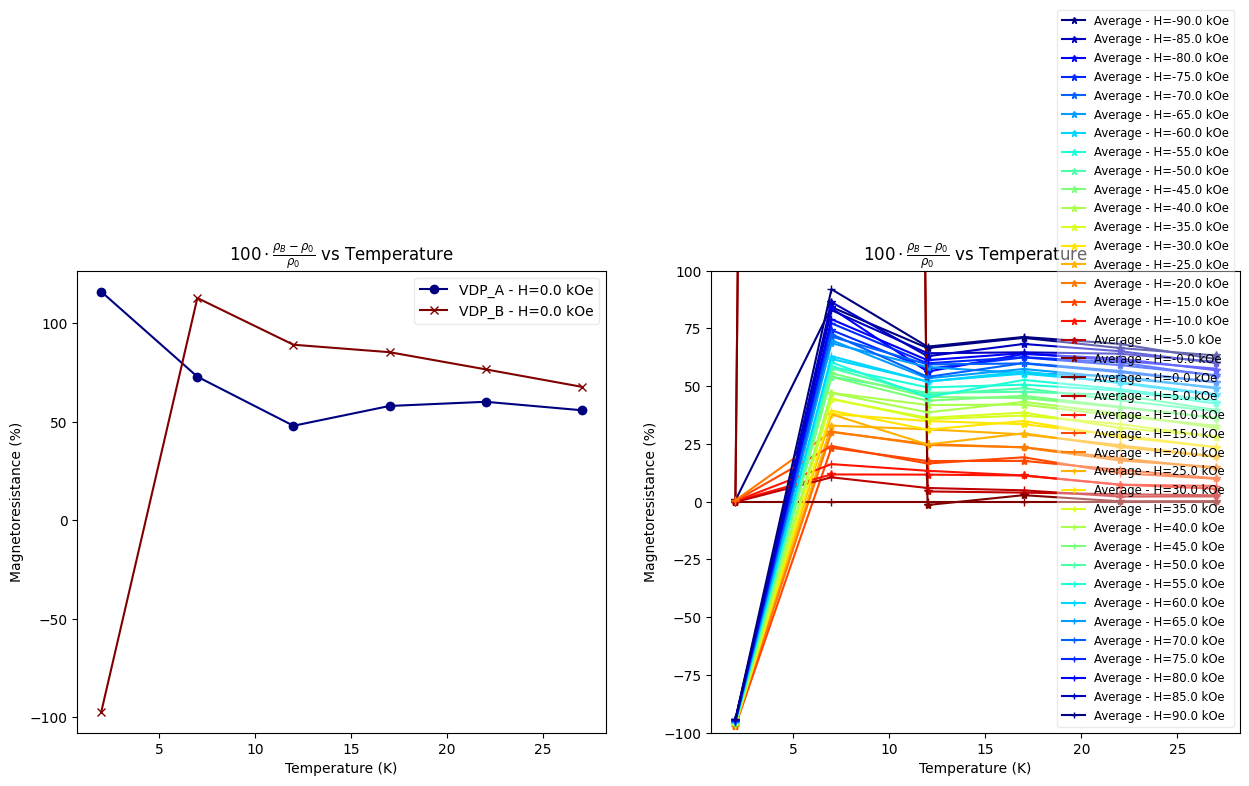

In [28]:
# Calculate the magnetoresistance at each temperature and field strength
# mag_res(temperature, field, index) where: index 0 = VDP config A, index 1 = VDP config B, index 2 = average of A and B
mag_res = functions.magnetoresistance(data_np, film_thickness, ctf, tf_av)

fig5 = plt.figure(figsize=(15, 6))
ax = fig5.add_subplot(121)  # Create two subplot
ax2 = fig5.add_subplot(122)  


# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('jet')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('jet_r')(np.linspace(0, 1, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['*'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)

# Find the index of the maximum positive field strength
f_index = int(ctf[5])-1#int(ctf[5]/2 - 1)

# Sub_plot 1: Comparing configurations A and B
ax.plot(ctf[1], mag_res[:,f_index,0], marker='o', color=c_val[0], label = f'VDP_A - H={np.round(ctf[2][f_index]/1000,0)} kOe')
ax.plot(ctf[1], mag_res[:,f_index,1], marker='x', color=c_val[int(len(c_val)/2)], label = f'VDP_B - H={np.round(ctf[2][f_index]/1000,0)} kOe')

ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'Magnetoresistance (%)')
ax.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
ax.legend(loc = 'best', framealpha=0.4)

# Sub_plot 2: Comparing the average magnetoresistance vs T for various field strengths 

for H_count, H in enumerate(ctf[2], start=0):
    ax2.plot(ctf[1], mag_res[:,H_count,2], marker=markers[H_count], color=c_val[H_count], label = f'Average - H={np.round(ctf[2][H_count]*10,0)} kOe')     

ax2.set_xlabel('Temperature (K)')
ax2.set_ylabel(r'Magnetoresistance (%)')
ax2.set_title(r'$100 \cdot \frac{\rho_{B} - \rho_{0}}{\rho_{0}}$ vs Temperature')
# Add a legend outside the plot
ax2.legend(loc='lower right', fontsize='small', markerscale=0.8, framealpha=0.4)

# Adjust the plot to make room for the legend
#plt.tight_layout(rect=[0, 0, 0.75, 1])

ax2.set_ylim(-100,100)

plt.show()

if plot_data == True:
    fig5.savefig(Path(path_out).joinpath(f'{plot_string}_magnetoresistance_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Arhenius Plot

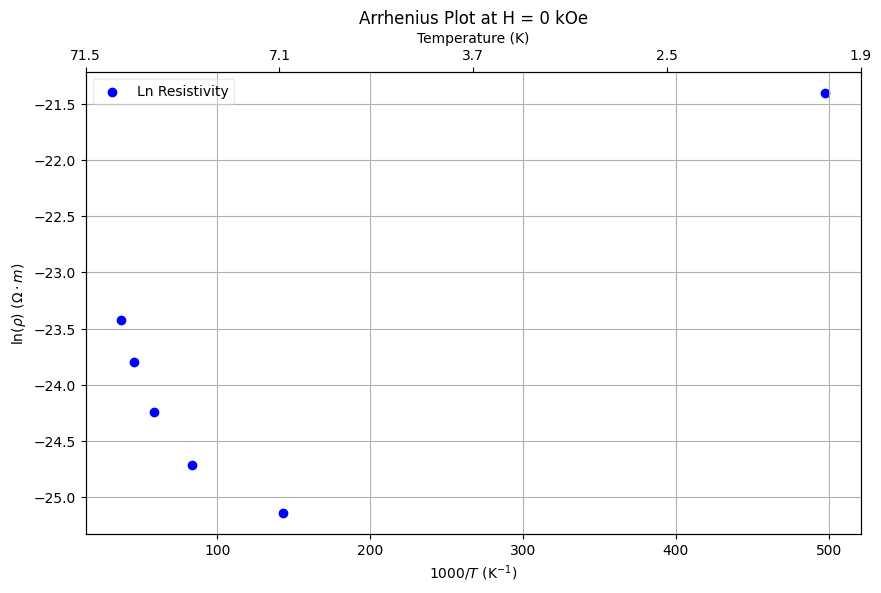

In [33]:
# Create a figure and axis
fig6 = plt.figure(figsize=(10, 6))
ax = fig6.add_subplot(111)  # Create a single subplot

# Plot rho_film vs 1000/Temp
ax.scatter(1000 / res_data[int(ctf[5]/2)::ctf[5],0], np.log(res_data[int(ctf[5]/2)::ctf[5],4]), marker='o', linestyle='-', color='b', label='Ln Resistivity')

# Set labels and title
ax.set_xlabel(r'$1000/T$ (K$^{-1}$)')
ax.set_ylabel(r'$\ln(\rho)$ ($\Omega \cdot m$)')
ax.set_title('Arrhenius Plot at H = 0 kOe')

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc = 'best', framealpha=0.4)

# Create a secondary x-axis at the top
ax2 = ax.twiny()

# Set the limits of the secondary x-axis to match the primary x-axis
ax2.set_xlim(ax.get_xlim())

# Set the ticks and labels for the secondary x-axis
new_ticks = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], num=5)
ax2.set_xticks(new_ticks)
ax2.set_xticklabels([f'{1000/tick:.1f}' for tick in new_ticks])
ax2.set_xlabel('Temperature (K)')

# Show the plot
plt.show()

if plot_data == True:
    fig6.savefig(Path(path_out).joinpath(f'{plot_string}_Arrhenius Plot.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Calculate the Hall Resistivity ($\rho_{xy}$)
- This is: $\frac{V_{measured-perpendicular}}{I_{source}}*t$


In [12]:
[hall_data, hall_data_df, hall_coefficient, hall_coefficient_df] = functions.vdp_hall(data_np, film_thickness, ctf, tf_av)
print(hall_data_df.head(20))

    Temp (K)  Field (T)  rho_xy_A(ohm.m)  R_squared(I)_A  rho_xy_B(ohm.m)  \
0     1.9999  -8.999963    -1.673028e-10       -0.999856    -1.673028e-10   
1     1.9993  -8.500045    -1.583207e-10       -0.999853    -1.583207e-10   
2     2.0002  -8.000032    -1.487573e-10       -0.999899    -1.487573e-10   
3     2.0001  -7.500031    -1.401338e-10       -0.999895    -1.401338e-10   
4     2.0013  -7.000051    -1.315177e-10       -0.999869    -1.315177e-10   
5     1.9996  -6.500044    -1.219363e-10       -0.999835    -1.219363e-10   
6     2.0004  -6.000038    -1.129871e-10       -0.999797    -1.129871e-10   
7     1.9999  -5.500042    -1.040771e-10       -0.999789    -1.040771e-10   
8     2.0001  -5.000042    -9.466453e-11       -0.999739    -9.466453e-11   
9     1.9996  -4.500050    -8.527847e-11       -0.999796    -8.527847e-11   
10    2.0002  -4.000027    -7.632463e-11       -0.999700    -7.632463e-11   
11    1.9996  -3.500031    -6.729979e-11       -0.999705    -6.729979e-11   

## Plot IV Data to check linearity of Hall measurements

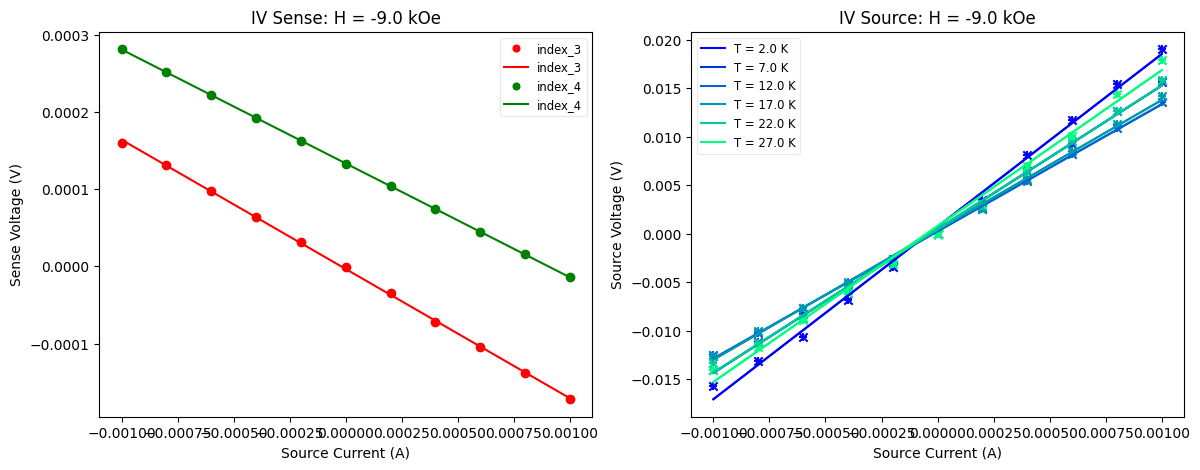

In [13]:
fig0 = plt.figure(figsize=(14, 5))
gs = fig0.add_gridspec(1, 2)
ax = fig0.add_subplot(gs[0, 0])
ax1 = fig0.add_subplot(gs[0, 1])

labels = ['index_3', 'index_4', 'index_5', 'index_6']

## If you get a problem with regression, uncomment the below code to plot V vs I and check the linearity of the fit manually
colors = ['r', 'g', 'b', 'm']
for i in range(2):
    R_test = linregress(data_np[0:ctf[3], 2, i], data_np[0:ctf[3], 4, i]) 
    ax.plot(data_np[0:ctf[3], 2, i], data_np[0:ctf[3], 4, i], 'o', label=f'{labels[i]}', color=colors[i])
    ax.plot(data_np[0:ctf[3], 2, i], R_test.intercept + R_test.slope * data_np[0:ctf[3], 2, i], color=colors[i], label=f'{labels[i]}')
ax.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

# Set labels and title
ax.set_xlabel('Source Current (A)')
ax.set_ylabel('Sense Voltage (V)')
ax.set_title(f'IV Sense: H = {np.round(data_np[0, 1, 2],decimals=0)} kOe')


## Plotting the Source IV data
colors = plt.get_cmap('winter')(np.linspace(0, 1, ctf[4]))
markers = ['+', 'x', 'o', '*']
for t in range(ctf[4]):
    counter = t*ctf[3]*ctf[5]
    for i in range(2):  
        R_test_2 = linregress(data_np[counter:ctf[3]+counter, 2, i], data_np[counter:ctf[3]+counter, 3, i])
        ax1.scatter(data_np[counter:ctf[3]+counter, 2, i], data_np[counter:ctf[3]+counter, 3, i], color=colors[t], marker=markers[i])
        ax1.plot(data_np[counter:ctf[3]+counter, 2, i], R_test_2.intercept + R_test_2.slope * data_np[counter:ctf[3]+counter, 2, i], color=colors[t])
    
    # Add a dummy plot for the legend entry
    ax1.plot([], [], color=colors[t], label=f'T = {ctf[1][t]} K')
    
    ax1.legend(loc='best', fontsize='small', markerscale=0.8, framealpha=0.4)

# Set labels and title
ax1.set_xlabel('Source Current (A)')
ax1.set_ylabel('Source Voltage (V)')
ax1.set_title(f'IV Source: H = {np.round(data_np[0, 1, 2],decimals=0)} kOe')


plt.show()

if plot_data == True:
    fig0.savefig(Path(path_out).joinpath(f'{plot_string}_IV_resistivity.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## R-squared Analysis to Check Linearity of Resistivity I-V data

average R-squared_A = 0.9931763210924909
average R-squared_B = 0.9931763210924909


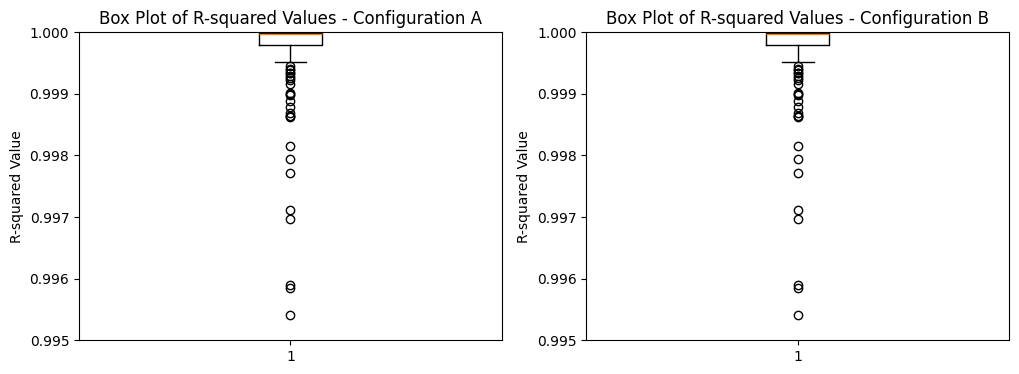

In [14]:
print('average R-squared_A =',np.mean(np.abs(hall_data[:,3])))
print('average R-squared_B =',np.mean(np.abs(hall_data[:,5])))

# Plot R-square values in a boxplot
# Note that the y axis is showing the deviation in 1e-6 from the perfect value of 1 so generally the values are very close to 1
fig7 = plt.figure(figsize=(12, 4))
ax = fig7.add_subplot(121)
ax.boxplot(np.abs(hall_data[:,3]))
ax.set_title('Box Plot of R-squared Values - Configuration A')
ax.set_ylabel('R-squared Value')
ax.set_ylim(1-5e-3, 1)  # If needed, you can set x-axis limits too

ax2 = fig7.add_subplot(122)
ax2.boxplot(np.abs(hall_data[:,5]))
ax2.set_title('Box Plot of R-squared Values - Configuration B')
ax2.set_ylabel('R-squared Value')
ax2.set_ylim(1-5e-3, 1)  # If needed, you can set x-axis limits too
plt.show()


### If you get a problem with regression, uncomment the below code to plot V vs I and check the linearity of the fit manually
# R_test = linregress(data_np[0:ctf[3]-1, 2, 2], data_np[0:ctf[3]-1, 4, 2])   
# plt.plot(data_np[0:ctf[3], 2, 2], data_np[0:ctf[3], 4, 2], 'o', label='original data')
# plt.plot(data_np[0:ctf[3], 2, 2], R_test.intercept + R_test.slope * data_np[0:ctf[3], 2, 2], 'r', label='fitted line')
# plt.legend()
# plt.show()

if plot_data == True:
    fig7.savefig(Path(path_out).joinpath(f'{plot_string}_R_squared_hall_res.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall resisitivity vs Temperature

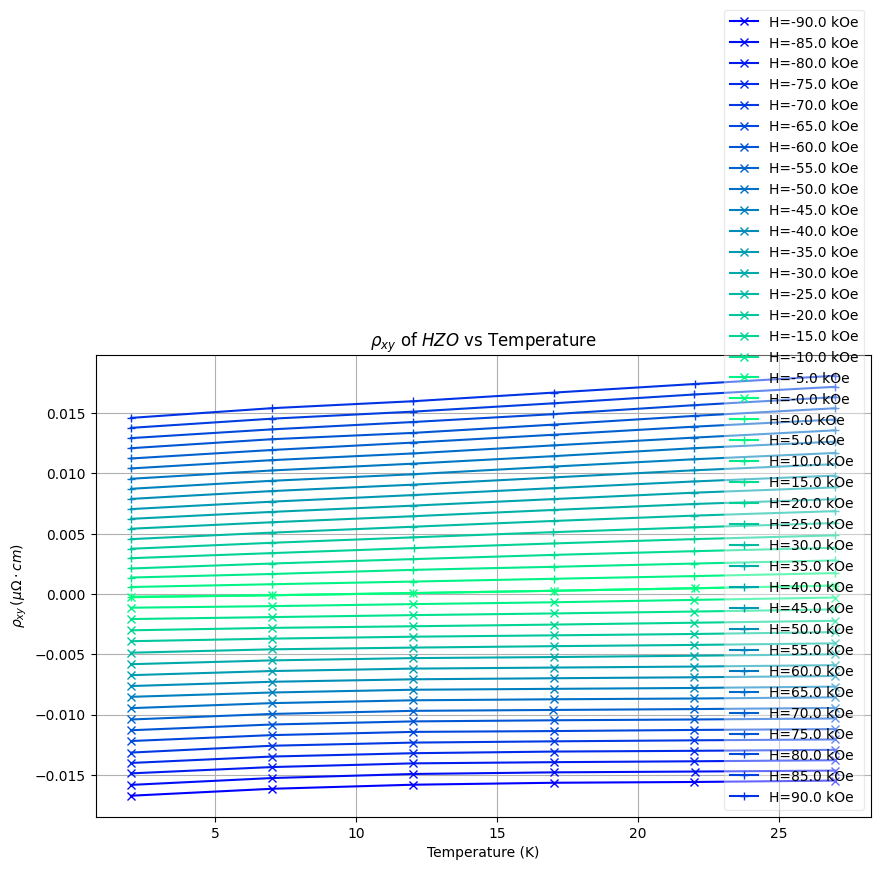

In [15]:
# Create a figure and axis
fig8 = plt.figure(figsize=(10, 6))
ax = fig8.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
cmap1 = plt.get_cmap('winter')(np.linspace(0, 1, int(ctf[5] / 2)))
cmap2 = plt.get_cmap('winter_r')(np.linspace(0, 0.8, int(ctf[5] / 2)))
c_val = np.vstack((cmap1, cmap2))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * int(ctf[5] / 2) + ['+'] * int(ctf[5] / 2)


for k in range(ctf[5]):
    # Plot rho_film vs Temp
    ax.plot(hall_data[k::ctf[5],0], hall_data[k::ctf[5],6]*1e8 , marker=markers[k], color=c_val[k], label = f'H={np.round(hall_data[k,1]*10,decimals=0)} kOe')

# Set labels and title
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' of {material_title} vs Temperature')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc = 'lower right', framealpha=0.4)

# Show the plot
plt.show()

if plot_data == True:
    fig8.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xy_vs_T.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall Resistivity vs Field

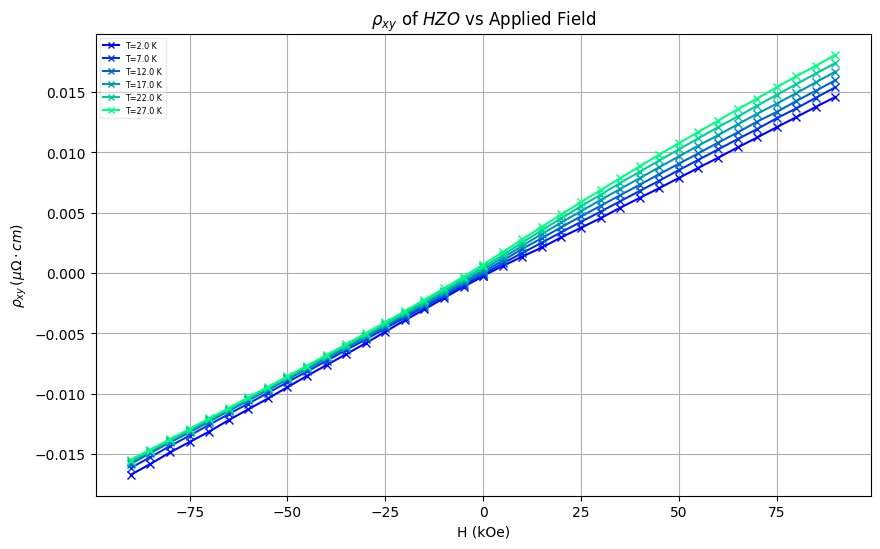

In [16]:
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

# Create a figure and axis
fig9 = plt.figure(figsize=(10, 6))
ax = fig9.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
c_val = plt.get_cmap('winter')(np.linspace(0, 1, ctf[4]))


# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * ctf[4]


for t_count, t in enumerate(ctf[1], start=0):
    if t > 1:
        index = t_count * ctf[5]
        # Plot rho_film vs Temp
        ax.plot(hall_data[index:index+ctf[5],1]*10, hall_data[index:index+ctf[5],6]*1e8, marker=markers[t_count], color=c_val[t_count], label = f'T={np.round(t,decimals=0)} K')
# Set labels and title
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' of {material_title} vs Applied Field')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc = 'best', framealpha=0.4, markerscale=0.8, fontsize='xx-small')

# Show the plot
plt.show()

if plot_data == True:
    fig9.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xy_vs_field.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall Resistivity vs Field - Offset removed

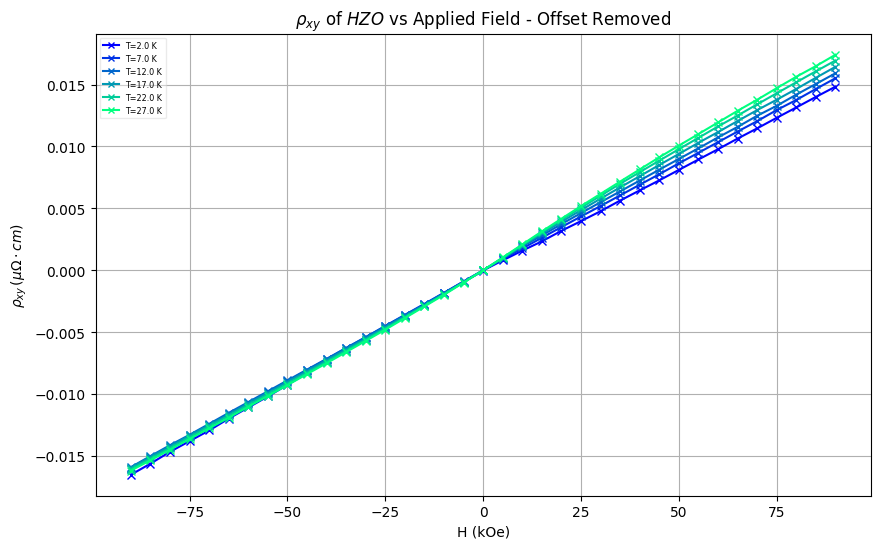

In [ ]:
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

# Create a figure and axis
fig10 = plt.figure(figsize=(10, 6))
ax = fig10.add_subplot(111)  # Create a single subplot

#c_val = plt.cm.jet(np.linspace(0,1,num_field_points))
# Generating one set of colors for increasing positive field and one set for decreasing negative field
# higher field is brighter color in both cases
c_val = plt.get_cmap('winter')(np.linspace(0, 1, ctf[4]))


# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * ctf[4]


for t_count, t in enumerate(ctf[1], start=0):
    if t > 1:
        index = t_count * ctf[5]
        # Plot rho_film vs Temp
        ax.plot(hall_data[index:index+ctf[5],1]*10, (hall_data[index:index+ctf[5],6]-hall_data[index+int(ctf[5]/2),6])*1e8, marker=markers[t_count], color=c_val[t_count], label = f'T={np.round(t,decimals=0)} K')
    
# Set labels and title
ax.set_xlabel('H (kOe)')
ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$' f' of {material_title} vs Applied Field - Offset Removed')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc = 'best', framealpha=0.4, markerscale=0.8, fontsize='xx-small')

# Show the plot
plt.show()

if plot_data == True:
    fig10.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xy_vs_field_0offset.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

## Hall Coeff Vs T?

In [18]:
print(hall_coefficient_df.head(10))

   Temp (K)      Hallco_A  R^2(H)_A      Hallco_B  R^2(H)_B  Hallco_average
0    2.0002  1.738592e-11  0.999626  1.738592e-11  0.999626    1.738592e-11
1    6.9991  1.755283e-11  0.999953  1.755283e-11  0.999953    1.755283e-11
2   12.0013  1.778178e-11  0.999962  1.778178e-11  0.999962    1.778178e-11
3   17.0037  1.819426e-11  0.999880  1.819426e-11  0.999880    1.819426e-11
4   22.0074  1.863718e-11  0.999765  1.863718e-11  0.999765    1.863718e-11
5   27.0044  1.900584e-11  0.999656  1.900584e-11  0.999656    1.900584e-11


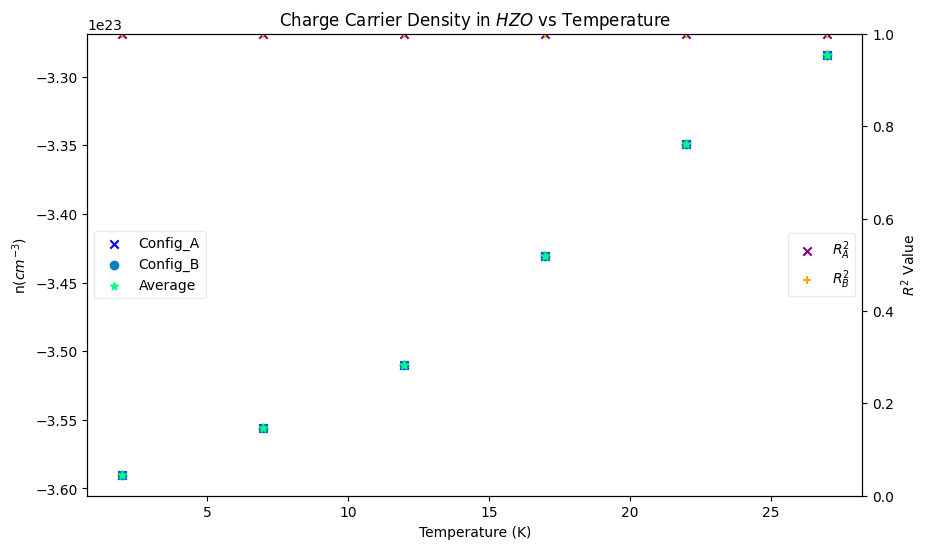

In [19]:


# Create a figure and axis
fig11 = plt.figure(figsize=(10, 6))
ax = fig11.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, 3))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x','o','*']


ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 1],scipy.constants.e)), marker=markers[0], color=c_val[0], label=f'Config_A')
ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 3],scipy.constants.e)), marker=markers[1], color=c_val[1], label=f'Config_B')
ax.scatter(hall_coefficient[:, 0], 1e-6*np.divide(-1,np.multiply(hall_coefficient[:, 5],scipy.constants.e)), marker=markers[2], color=c_val[2], label=f'Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'n($cm^{-3}$)')
ax.set_title(f'Charge Carrier Density in {material_title} vs Temperature')

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left', framealpha=0.4)

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 2]), color='purple', marker = 'x', label='$R^2_{A}$')
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 4]), color='orange', marker = '+', label='$R^2_{B}$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right', framealpha=0.4)
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig11.savefig(Path(path_out).joinpath(f'{plot_string}_n_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## Mobility vs T

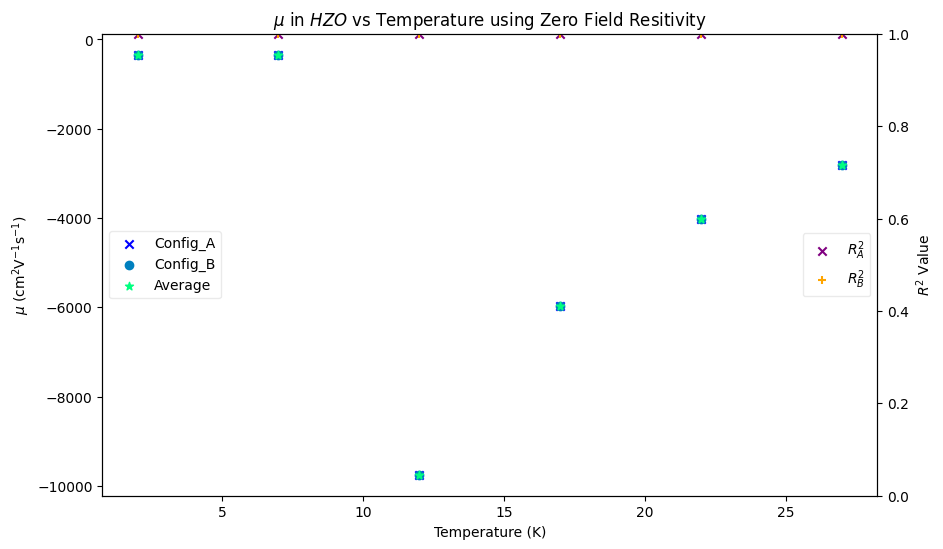

In [20]:


# Create a figure and axis
fig12 = plt.figure(figsize=(10, 6))
ax = fig12.add_subplot(111)  # Create a single subplot

# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, 3))

# Create separate marker arrays for positive and negative fields stitched together
markers = ['x','o','*']


ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 1],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[0], color=c_val[0], label=f'Config_A')
ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 3],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[1], color=c_val[1], label=f'Config_B')
ax.scatter(hall_coefficient[:, 0], 1e4*np.divide(-hall_coefficient[:, 5],res_data[int(ctf[5]/2-1)::ctf[5],4]), marker=markers[2], color=c_val[2], label=f'Average')

# Set labels and title for the left y-axis
ax.set_xlabel('Temperature (K)')
ax.set_ylabel(r'$\mu$ (cm$^2$V$^{-1}$s$^{-1}$)')
ax.set_title(r'$\mu$' f' in {material_title} vs Temperature using Zero Field Resitivity')
#ax.set_ylim(-100, 0)

# Add a grid
ax.grid(False)

# Add a legend for the left y-axis
ax.legend(loc='center left', framealpha=0.4)

# Create a second y-axis on the right
ax2 = ax.twinx()

# Plot data on the right y-axis
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 2]), color='purple', marker = 'x', label='$R^2_{A}$')
ax2.scatter(hall_coefficient[:, 0], np.abs(hall_coefficient[:, 4]), color='orange', marker = '+', label='$R^2_{B}$')

# Set labels for the right y-axis
ax2.set_ylabel('$R^2$ Value')

# Add a legend for the right y-axis
ax2.legend(loc='center right', framealpha=0.4)
ax2.set_ylim(0, 1)

# Show the plot
plt.show()

if plot_data == True:
    fig12.savefig(Path(path_out).joinpath(f'{plot_string}_mobility_vs_temperature.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)


## $\rho_{xy}$ vs $\rho_{xx}$
- Can have problems where with both holes and electrons the carriers can cancel out the measured hall voltage
- Need to check this?

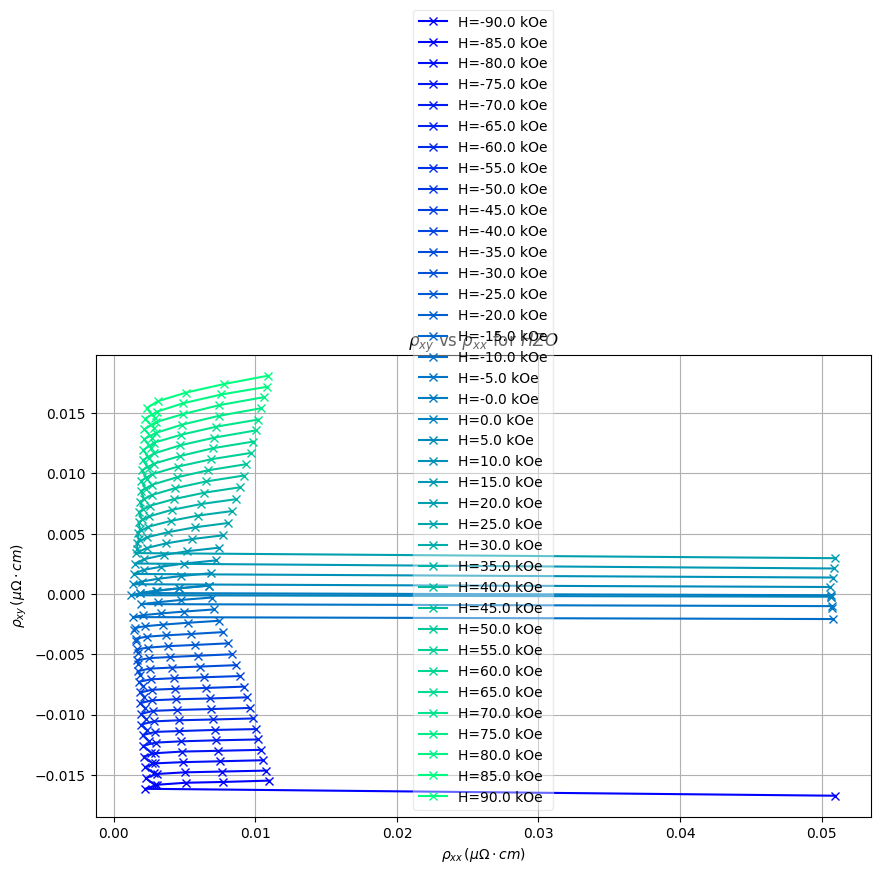

In [21]:
#ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]

# Create a figure and axis
fig13 = plt.figure(figsize=(10, 6))
ax = fig13.add_subplot(111)  # Create a single subplot


# Generate color map
c_val = plt.get_cmap('winter')(np.linspace(0, 1, ctf[5]))

# Create separate marker arrays for positive and negative fields stiched together
markers = ['x'] * ctf[5]


for H_count, H in enumerate(ctf[2], start=0):
    index = t_count * ctf[5]
    # Plot rho_film vs Temp
    ax.plot(res_data[H_count::ctf[5],4]*1e8, hall_data[H_count::ctf[5],4]*1e8, marker=markers[H_count], color=c_val[H_count], label = f'H={np.round(H*10,decimals=0)} kOe')
            #ctf = [current_unique, temp_unique, field_unique, current_no, temp_no, field_no]


ax.set_ylabel(r'$\rho_{xy}\,(\mu \Omega \cdot cm)$')
ax.set_xlabel(r'$\rho_{xx}\,(\mu \Omega \cdot cm)$')
ax.set_title(r'$\rho_{xy}$ vs $\rho_{xx}$' f' for {material_title}')
# ax.set_xlim(0,100)
# ax.set_ylim(1425,1525)

# Add a grid
ax.grid(True)

# Add a legend
ax.legend(loc = 'best', framealpha=0.4)

# Show the plot
plt.show()

if plot_data == True:
    fig13.savefig(Path(path_out).joinpath(f'{plot_string}_rho_xx_vs_rho_xy.{fig_format}'), dpi=300, bbox_inches='tight', transparent=plot_transparency)

In [22]:
if powerpoint_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()

    # Define a function to add a slide with a title and image
    def add_slide(prs, title, fig):
        slide_layout = prs.slide_layouts[5]  # Use a blank slide layout
        slide = prs.slides.add_slide(slide_layout)
        
        # Set background color with 40% transparency
        background = slide.background
        fill = background.fill
        fill.solid()
        fill.fore_color.rgb = RGBColor(200, 200, 200)

        # Add title with custom font
        title_shape = slide.shapes.title
        title_shape.text = title
        title_shape.text_frame.paragraphs[0].font.size = Pt(24)
        title_shape.text_frame.paragraphs[0].font.bold = True
        title_shape.text_frame.paragraphs[0].font.color.rgb = RGBColor(0, 0, 0)
        title_shape.text_frame.paragraphs[0].font.name = 'Arial'
        title_shape.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

        # Save the figure as an image
        img_path = f"{title}.png"
        fig.savefig(img_path, dpi=300, bbox_inches='tight', transparent=True)

        
         # Calculate the left position to center the image
        slide_width = prs.slide_width
        image_width = Inches(8)
        left = (slide_width - image_width) / 2
        top = Inches(2)  # Position the figure lower down by 2 inches
        
        # Add the image to the slide
        pic = slide.shapes.add_picture(img_path, left, top, width=image_width)

    # List of figures and their corresponding titles
    figures = [
        (fig0, "Plot IV data to Check Linearity"),
        (fig1, "R-squared Analysis to Check Linearity of I-V data"),
        (fig2, "Resistivity Configuration Compararison"),
        (fig3, "Resistivity vs Temperature"),
        (fig4, "Magnetoresistance vs H"),
        (fig5, "Magnetoresistance Vs T"),
        (fig6, "Arhenius Plot"),
        (fig7, "R-squared Analysis to Check Linearity of Resistivity I-V data"),
        (fig8, "Hall resisitivity vs Temperature"),
        (fig9, "Hall resisitivity vs Applied Field"),
        (fig10, "Hall resisitivity vs Applied Field - Offset Removed"),
        (fig11, "Hall Coeff Vs T"),
        (fig12, "Mobility vs T"),
        (fig13, "ρ_xy vs ρ_xx")
    ]

    # Add each figure to the PowerPoint presentation
    for fig, title in figures:
        add_slide(prs, title, fig)

    # Save the PowerPoint presentation
    prs.save(Path(path_out).joinpath(f'{plot_string}_figures.pptx'))